# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_ind_from_stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [20]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A__ :  Data is right skewed / right tailed and doesnot follow normal distribution curve. 
- It's standard deviation is high that shows data is spread over.



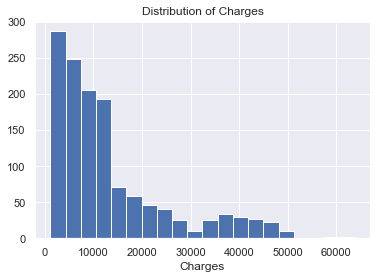

In [27]:
sns.set()
_=plt.hist(medical['charges'],bins=20)
_=plt.xlabel("Charges")
_=plt.title("Distribution of Charges")
plt.show()

In [28]:
mean = np.mean(medical['charges'])
sigma=np.std(medical['charges'],ddof=1) #t distribution - as it is sample mean n sample std. deviation.
print("mean = {:,} \nstandard deviation = {:,}".format(np.round(mean,2),np.round(sigma,2)))

mean = 13,270.42 
standard deviation = 12,110.01


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
- Charges represent random sample because of size of data being 1300 which reaches sample size assumption
- t-distribution with degree of freedom is appropriate as we don't have population sigma and distribution is not normal.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ It would be a __one sided interval__ when administrator's concern taken into account because the concern about observed mean less than expected mean.

In [48]:
#being one sided and that too on left side. 95% CI means 1- 0.05 percentile.
p=0.05
critical_value=t.ppf(p,df=len(medical)-1)
print("Critical t value of 95% CI = {}".format(critical_value))

Critical t value of 95% CI = -1.6459941145571324


In [49]:
#95% CI of mean is mean + moe where 
#moe = critical_value *(sigma/sqrt(size))
moe = critical_value * (sigma/np.sqrt(len(medical)))
moe

-544.9350813250253

In [50]:
CI_mean_interval = mean+moe
CI_mean_interval


12725.48718381623

- So, it shows that we can say with confidence that 95% of times mean value with be greater than 12,725.
- 12,000 is less than 95% CI which makes it a very rare event and there __should be some concern shown on decreasing hospital mean charge__.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ There Hypothesis is as follows.

- Null Hypothesis (H0) : Means of charges for both insured and non insured patient is same (Mu(insured) = Mu(not insured))
- Alternate Hypothesis (H1) : Means differ ( Mu(insured) ≠ Mu(not insured))
- Because we are considering pooled standard deviation method, __we assume that Population standard deviations for both insurued and not insured groups to be same__.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [52]:
#Manual Approach. 
# 2 sided interval
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [92]:
#Let us consider n1 = insured size and
#n0 = not insured size
print("\n\n T STATISTICS \n\n")
n1,n0 = medical.insuranceclaim.value_counts()
print("\n Sizes: \n")
print(n0, n1)

#means
x0 = medical[medical.insuranceclaim==0]['charges'].mean()
x1 = medical[medical.insuranceclaim==1]['charges'].mean()
print("\n Means \n")
print(x0,x1)

#Std
s0 = medical[medical.insuranceclaim==0]['charges'].std()
s1 = medical[medical.insuranceclaim==1]['charges'].std()
print("\nStd. Deviations \n")
print(s0,s1)
sp = np.sqrt((((n0-1)*(s0**2)) + ((n1-1)*(s1**2)))/(n0+n1-2))
print("\nPooled Std = {}".format(sp))
#critical t value
critical_t_value = (x0-x1)/(sp*np.sqrt((1/n0)+(1/n1)))
print("\nCritical t value = {}".format(critical_t_value))
#p-value 
p_value= 2*t.cdf(critical_t_value,n0+n1-2)  # 2 sided interval
print("\n P value = {}".format(p_value))
if p_value < 0.05 :
    print("\nRejecting the Null hypothesis that states - Charges won't differ according to Insurance claim column")
else:
    print("\nFailed to reject the null hypothesis")



 T STATISTICS 



 Sizes: 

555 783

 Means 

8821.421892306294 16423.928276537663

Std. Deviations 

6446.510126811736 14045.928418802127

Pooled Std = 11520.034268775256

Critical t value = -11.89329903087671

 P value = 4.461230231620972e-31

Rejecting the Null hypothesis that states - Charges won't differ according to Insurance claim column


In [93]:
#scipy.stats method
# ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True)
#from scipy.stats import ttest_ind_from_stats


t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -11.893299030876712 and P-value of 4.461230231620717e-31


References 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html#scipy.stats.ttest_ind_from_stats"> t-test method</a>

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A__ : nothing explicitly given for z - test in scipy.stats But in scipy.model we have something
<a href=https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html> z-test model </a>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test